# Decision tree on titanic dataset

In [82]:
import numpy as np 
import pandas as pd
import math

In [3]:
data = pd.read_csv('train.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
col_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]

In [8]:
data_clean = data.drop(col_to_drop, axis =1)

In [9]:
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [12]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [16]:
data_clean = data_clean.fillna(data_clean["Age"].mean())
# Another way is use Imputer class of sklearn to fill missing values

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [24]:
Y = data_clean[["Survived"]]
X = data_clean.drop(["Survived"], axis=1)

In [25]:
print(X.shape, Y.shape)

(891, 6) (891, 1)


In [86]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    #print(counts)
    ent = 0.0

    for ix in counts[1]:
        p = ix/N
        ent += (-1.0 * (p * np.log2(p) ))

    return ent



In [87]:
col = np.array([0,0,0,0,0,0,0,0,1])
entropy(col)

0.5032583347756457

In [88]:
def divide_data(x_data, fkey, fval):
    #worrk with panda dataframe
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)

    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        if val > fval:
            #append() for dataframe is not available to conncat df and series tou have to write the below code
            x_right = pd.concat([x_right, x_data.loc[ix].to_frame().T])
        else:
            x_left = pd.concat([x_left, x_data.loc[ix].to_frame().T])
 
    return x_left, x_right

In [89]:
#left, right = divide_data(data_clean[:10],'Sex',0.5)
#print(left)
#print(right)

In [90]:
def information_gain(x_data, fkey, fval):
    
    left, right = divide_data(x_data, fkey, fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]

    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000
    i_gain = entropy(x_data.Survived) - (l* entropy(left.Survived) + r*entropy(right.Survived) )

    return i_gain
    
    


In [91]:
# test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


## Decision Tree Classifier
- DTC is overfitted
- you have to fixed the depth of tree or else there are different way to handle this problem

In [131]:
class DecisionTree:
    def __init__(self, depth = 0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None 
        self.max_depth = max_depth
        self.depth = depth
        self.target = None

    def train(self, X_train):
        features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare']
        info_gains = []

        for ix in features:
            i_gain = information_gain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)

        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        #print("Making Tree and feature is ", self.fkey)

        #Split data

        data_left, data_right = divide_data(X_train, self.fkey, self.fval)

        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop=True)

        # Truely a leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        #Stop early when depth >= max depth
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        # Recursive Case
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)

        # set the target at every node
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
              

    def predict(self, test_data):
    
        if test_data[self.fkey] > self.fval:
            # go to right 
            if self.right is None:
                return self.target
            return self.right.predict(test_data)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test_data)


In [132]:
d = DecisionTree()
d.train(data_clean)

In [133]:
test_data = pd.read_csv('test.csv')

In [134]:
test_data = test_data.drop(col_to_drop, axis =1)
test_data["Sex"] = le.fit_transform(test_data["Sex"])

In [142]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(d.predict(test_data.loc[ix]))

In [145]:
y_pred[:10]

['Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead']

In [146]:
y_pred = le.fit_transform(y_pred)

In [147]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

# Decision Tree using sk-learn

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [153]:
sk_tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [156]:
test_data = test_data.fillna(test_data["Age"].mean())
test_data = test_data.fillna(test_data["Fare"].mean())

In [160]:
sk_pred = sk_tree.predict(test_data)

In [161]:
print(sk_pred.shape, y_pred.shape)

(418,) (418,)


In [174]:
sk_tree.score(test_data, y_pred)

0.9234449760765551

# Visualize Decision Tree

In [ ]:
#! pip install pydotplus

In [178]:
#import pydotplus
#from six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz



In [179]:
#ot_data = StringIO()
#export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)

In [ ]:
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())


###  Not working due to GraphViz's executables not found

# Random Forest
Random forest overcome the problem of overfitting and high variance

In [195]:
# Create Traing and test Data from Training data
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
tes_data= data_clean[split:]
#tes_data = tes_data.reset_index(drop=True)
print(tes_data.shape, train_data.shape)

(268, 7) (623, 7)


In [197]:
tes_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
623,0,3,1,21.0,0,0,7.8542
624,0,3,1,21.0,0,0,16.1000
625,0,1,1,61.0,0,0,32.3208
626,0,2,1,57.0,0,0,12.3500
627,1,1,0,21.0,0,0,77.9583


In [203]:
y_train = train_data[["Survived"]].values.reshape((-1,))
X_train = train_data.drop(["Survived"], axis=1)
y_test = tes_data[["Survived"]].values.reshape((-1,))
X_test = tes_data.drop(["Survived"], axis=1)

In [221]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

sk_tree.fit(X_train,y_train)

sk_tree.score(X_train,y_train)

0.8443017656500803

In [222]:
sk_tree.score(X_test,y_test)

0.8283582089552238

In [223]:
from sklearn.ensemble import RandomForestClassifier


In [228]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=5)

In [229]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [230]:
rf.score(X_train,y_train)

0.8587479935794543

In [231]:
rf.score(X_test, y_test)

0.8246268656716418

In [263]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=7, max_depth=5,criterion="entropy"), X_train,y_train,cv=5)

In [264]:
acc.mean()

0.8233677419354837

- Method to check estimator number for increasing accuracy

In [269]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=5, criterion="entropy"),X_train,y_train, cv=5).mean()
    acc_list.append(acc)


In [272]:
print(acc_list)
np.argmax(acc_list)

[0.7928, 0.7593161290322581, 0.8009677419354837, 0.7689548387096774, 0.7656774193548387, 0.7833419354838709, 0.7929677419354839, 0.8121806451612903, 0.7994451612903225, 0.7897161290322581, 0.8073677419354839, 0.8217806451612903, 0.8137677419354837, 0.8185806451612903, 0.8090064516129033, 0.8170064516129033, 0.8202193548387097, 0.8057161290322581, 0.8057419354838709, 0.8313935483870967, 0.8105161290322581, 0.8089548387096774, 0.8153677419354839, 0.8153806451612903, 0.8121677419354839, 0.8266064516129031, 0.8153806451612903, 0.8218064516129033, 0.8233806451612903, 0.8185806451612903, 0.8025548387096773, 0.8073806451612903, 0.8137419354838709, 0.8089290322580645, 0.8073548387096775, 0.8105419354838709, 0.8137419354838709, 0.8025161290322581, 0.8153548387096773, 0.8185677419354839, 0.8153677419354839, 0.8089677419354839, 0.8009161290322581, 0.8121290322580645, 0.8121806451612903, 0.8234322580645161, 0.8169548387096774, 0.8137290322580645, 0.8153677419354839]


19

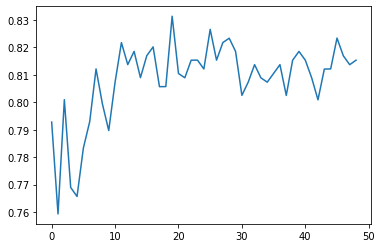

In [271]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.show()

In [277]:
test_acc = RandomForestClassifier(n_estimators=20, max_depth=5, criterion="entropy")

In [281]:
test_acc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20)

In [282]:
test_acc.score(X_test,y_test)

0.8283582089552238

In [283]:
test_acc.score(X_train,y_train)

0.85553772070626